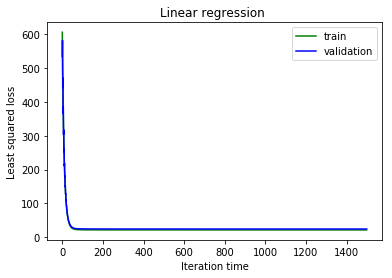

21.641412719
24.2913903508


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#读取数据 X和y用以记录 总输入和总输出
X,y=load_svmlight_file("G:/housing_scale")

#为输入后加上一列1,并记录总输入的样本数和特征数
X = X.toarray()
row,col=X.shape
X=np.column_stack((X,np.ones((row,1))))

#切分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#接下来先拿X_train和y_train开刀
row_train,col_train=X_train.shape
y_train=y_train.reshape(row_train,1)

row_test,col_test=X_test.shape
y_test=y_test.reshape(row_test,1)
#初始化参数 选择全零初始化
W=np.zeros((col+1,1))

#确定学习率和训练次数
n=0.001
count=0
max_count=1500

#用数组记录loss
loss_train=np.zeros(max_count)
loss_validation=np.zeros(max_count)

while(count<max_count):
    G=-X_train.T.dot(y_train)+X_train.T.dot(X_train).dot(W)
    loss_train[count]=((y_train-X_train.dot(W)).T.dot(y_train-X_train.dot(W)))/row_train
    loss_validation[count]=((y_test-X_test.dot(W)).T.dot(y_test-X_test.dot(W)))/row_test
    W=W-n*G
    count+=1
    

    
#绘图
x=range(max_count)
y_t = [loss_train[count] for count in x]
y_v=[loss_validation[count] for count in x]

plt.plot(x, y_t,'g-', label='train')  
plt.plot(x,y_v,'b-', label='validation')
plt.legend()

plt.xlabel('Iteration time')
plt.ylabel('Least squared loss')
plt.title('Linear regression ')
plt.show()

print(loss_train[max_count-1])
print(loss_validation[max_count-1])

